In [3]:
%pylab inline

rcParams["figure.figsize"] = (12, 9) #<--- large default figures

# Plot text elements
rcParams['axes.labelsize'] = 17
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

Populating the interactive namespace from numpy and matplotlib


# 1. Read tweets appearing on homepage

In [4]:
import tweepy
import pandas as pd

consumer_key = 'JElhoUDXi9BFsfCTVERhc9Vb1'
consumer_secret = 'CPws1P5KCYWbVePYKN0FpBmiSV1hvcow4x4O1lwRS4G1U31Jxl'

access_token ='3773670734-SHThwjiBZVvI34rdjWn7lGgCAM2YHLOL0OPCrrC'
access_token_secret = 'gGHhMkrKCOVQhvMRTOB0asLE7ZFIsNmcjN8s0rAZIqY07'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

public_tweets = api.home_timeline()
for (idx, tweet) in enumerate(public_tweets[0:3]): #First 3 tweets in my public feed
    print ('TWEET', idx, ': ', tweet.text)


TWEET 0 :  Step out of the Shadows with Bimodal IT and Private #Cloud https://t.co/hFIgLSW6vf https://t.co/NFot2420qn
TWEET 1 :  Newfound Spider Species Masquerades As a Dried-Up Leaf https://t.co/zhFOP8fUMQ https://t.co/PK605MkJBx
TWEET 2 :  frieze video: We're 25! Dan Fox reflects on how magazine publishing &amp; contemporary art have changed https://t.co/4dbPwUk93k


In [12]:
# The following code is taken from Alexander Galea's blog:
# https://galeascience.wordpress.com/2016/03/18/collecting-twitter-data-with-python/

import tweepy
from tweepy import OAuthHandler
import json
import datetime as dt
import time
import os
import sys


'''
The main() function can be run by executing the command: 
python twitter_search.py
'''

def load_api():
    ''' Function that loads the twitter API after authorizing the user. '''

    consumer_key = 'JElhoUDXi9BFsfCTVERhc9Vb1'
    consumer_secret = 'CPws1P5KCYWbVePYKN0FpBmiSV1hvcow4x4O1lwRS4G1U31Jxl'
    access_token = '3773670734-SHThwjiBZVvI34rdjWn7lGgCAM2YHLOL0OPCrrC'
    access_secret = 'gGHhMkrKCOVQhvMRTOB0asLE7ZFIsNmcjN8s0rAZIqY07'
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    # load the twitter API via tweepy
    api = tweepy.API(auth)
    return api
    # show the tweepy rate limits
    print (api.rate_limit_status())

    
def tweet_search(api, query, max_tweets, max_id, since_id, geocode):
    ''' Function that takes in a search string 'query', the maximum
        number of tweets 'max_tweets', and the minimum (i.e., starting)
        tweet id. It returns a list of tweepy.models.Status objects. '''

    searched_tweets = []
    while len(searched_tweets) < max_tweets:
        remaining_tweets = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=remaining_tweets,
                                    since_id=str(since_id),
				                    max_id=str(max_id-1))
#                                    geocode=geocode)
            print('found',len(new_tweets),'tweets')
            if not new_tweets:
                print('no tweets found')
                break
            searched_tweets.extend(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError:
            print('exception raised, waiting 15 minutes')
            print('(until:', dt.datetime.now()+dt.timedelta(minutes=15), ')')
            time.sleep(15*60)
            break # stop the loop
    return searched_tweets, max_id


def get_tweet_id(api, date='', days_ago=9, query='a'):
    ''' Function that gets the ID of a tweet. This ID can then be
        used as a 'starting point' from which to search. The query is
        required and has been set to a commonly used word by default.
        The variable 'days_ago' has been initialized to the maximum
        amount we are able to search back in time (9).'''

    if date:
        # return an ID from the start of the given day
        td = date + dt.timedelta(days=1)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        tweet = api.search(q=query, count=1, until=tweet_date)
    else:
        # return an ID from __ days ago
        td = dt.datetime.now() - dt.timedelta(days=days_ago)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        # get list of up to 10 tweets
        tweet = api.search(q=query, count=10, until=tweet_date)
        print('search limit (start/stop):',tweet[0].created_at)
        # return the id of the first tweet in the list
        return tweet[0].id


def write_tweets(tweets, filename):
    ''' Function that appends tweets to a file. '''

    with open(filename, 'a') as f:
        for tweet in tweets:
            json.dump(tweet._json, f)
            f.write('\n')


def main():
    ''' This is a script that continuously searches for tweets
        that were created over a given number of days. The search
        dates and search phrase can be changed below. '''

    ''' search variables: '''
    '''
    search_phrases = ['#imwithher', 
                      '#makeamericagreatagain',
                      'hillary',                      # odd dates
                      'trump',
                      '#election2016',
                      'election',
                      '#ivoted',
                      '#voted',
                      'POTUS']
   
    search_phrases = ['#donaldtrump',                 # repeated searches: #imwithher,
                      '#election2016',                # #makeamericagreatagain, #ivoted,
                      '#hillaryclinton',              # #election2016
                      '#imwithher',                   # even dates
                      '#ivoted',
                      '#maga',
                      '#makeamericagreatagain',
                      '#makedonalddrumpfagain',
                      '#neverhillary',
                      '#nevertrump']
    '''

    search_phrases = ['#donaldtrump',               
                      '#election2016',          
                      '#hillaryclinton',             
                      '#imwithher',
                      '#ivoted',                         
                      '#maga',                          
                      '#makeamericagreatagain',         
                      '#makedonalddrumpfagain',
                      '#neverhillary',
                      '#nevertrump',      
                      'hillary',
                      'trump',
                      'election',
                      '#voted',
                      'POTUS']

    
    # Specify search limits: a maximum number of days old (up to about 8) 
    # and a minimum number of days (as low as 0 i.e., “right now”). Collecting tweets over only 
    # one-day intervals is beneficial because each day is exported into its own file.
    
    time_limit = 0.5                           # runtime limit in hours (0.1 hours = 6 minutes)
    max_tweets = 100                           # number of tweets per each search (will be
                                               # iterated) - maximum is 100
    min_days_old, max_days_old = 2, 7          # search limits (8 to 9) e.g., from 7 to 8
                                               # gives current weekday from last week,
                                               # min_days_old=0 will search from right now
    USA = '39.8,-95.583068847656,2500km'       # this geocode includes all lower 48 American
                                               # states (and a large portion of Mexico and Canada)
    
    # loop over search items,
    # creating a new file for each
    for search_phrase in search_phrases:

        print('Search phrase =', search_phrase)

        ''' other variables '''
        name = search_phrase.split()[0]
        json_file_root = name + '/'  + name
        os.makedirs(os.path.dirname(json_file_root), exist_ok=True)
        read_IDs = False
        
        # open a file in which to store the tweets
        if max_days_old - min_days_old == 1:
            d = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}'.format(d.year, d.month, d.day)
        else:
            d1 = dt.datetime.now() - dt.timedelta(days=max_days_old-1)
            d2 = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}_to_{3}-{4:0>2}-{5:0>2}'.format(
                  d1.year, d1.month, d1.day, d2.year, d2.month, d2.day)
        json_file = json_file_root + '_' + day + '.json'
        if os.path.isfile(json_file):
            print('Appending tweets to file named: ',json_file)
            read_IDs = True
        
        # authorize and load the twitter API
        api = load_api()
        
        # set the 'starting point' ID for tweet collection
        if read_IDs:
            # open the json file and get the latest tweet ID
            with open(json_file, 'r') as f:
                lines = f.readlines()
                max_id = json.loads(lines[-1])['id']
                print('Searching from the bottom ID in file')
        else:
            # get the ID of a tweet that is min_days_old
            if min_days_old == 0:
                max_id = -1
            else:
                max_id = get_tweet_id(api, days_ago=(min_days_old-1))
        # set the smallest ID to search for
        since_id = get_tweet_id(api, days_ago=(max_days_old-1))
        print('max id (starting point) =', max_id)
        print('since id (ending point) =', since_id)
        


        ''' tweet gathering loop  '''
        start = dt.datetime.now()
        end = start + dt.timedelta(hours=time_limit)
        count, exitcount = 0, 0
        while dt.datetime.now() < end:
            count += 1
            print('count =',count)
            # collect tweets and update max_id
            tweets, max_id = tweet_search(api, search_phrase, max_tweets,
                                          max_id=max_id, since_id=since_id,
                                          geocode=USA)
            # write tweets to file in JSON format
            if tweets:
                write_tweets(tweets, json_file)
                exitcount = 0
            else:
                exitcount += 1
                if exitcount == 3:
                    if search_phrase == search_phrases[-1]:
                        sys.exit('Maximum number of empty tweet strings reached - exiting')
                    else:
                        print('Maximum number of empty tweet strings reached - breaking')
                        break


if __name__ == "__main__":
    main()

Search phrase = #donaldtrump
search limit (start/stop): 2016-11-14 23:59:59
search limit (start/stop): 2016-11-09 23:59:59
max id (starting point) = 798314569517121537
since id (ending point) = 796502630197526528
count = 1
found 100 tweets
count = 2
found 100 tweets
count = 3
found 100 tweets
count = 4
found 100 tweets
count = 5
found 100 tweets
count = 6
found 100 tweets
count = 7
found 100 tweets
count = 8
found 100 tweets
count = 9
found 100 tweets
count = 10
found 100 tweets
count = 11
found 100 tweets
count = 12
found 100 tweets
count = 13
found 100 tweets
count = 14
found 100 tweets
count = 15
found 100 tweets
count = 16
found 100 tweets
count = 17
found 100 tweets
count = 18
found 100 tweets
count = 19
found 100 tweets
count = 20
found 100 tweets
count = 21
found 100 tweets
count = 22
found 100 tweets
count = 23
found 100 tweets
count = 24
found 100 tweets
count = 25
found 100 tweets
count = 26
found 100 tweets
count = 27
found 100 tweets
count = 28
found 100 tweets
count = 29
f

In [6]:
%cd '/Users/evelyn/Workspaces/springboard/capstone/electiontweets'

/Users/evelyn/Workspaces/springboard/capstone/electiontweets


In [14]:
import json

tweet_files = ['#donaldtrump_2016-11-10_to_2016-11-14.json',               
               '#election2016_2016-11-10_to_2016-11-14.json',          
               '#hillaryclinton_2016-11-10_to_2016-11-14.json',             
               '#imwithher_2016-11-10_to_2016-11-14.json',
               '#ivoted_2016-11-10_to_2016-11-14.json',                         
               '#maga_2016-11-10_to_2016-11-14.json',                          
               '#makeamericagreatagain_2016-11-10_to_2016-11-14.json',         
               '#makedonalddrumpfagain_2016-11-10_to_2016-11-14.json',
               '#neverhillary_2016-11-10_to_2016-11-14.json',
               '#nevertrump_2016-11-10_to_2016-11-14.json',      
               'hillary_2016-11-10_to_2016-11-14.json',
               'trump_2016-11-10_to_2016-11-14.json',
               'election_2016-11-10_to_2016-11-14.json',
               '#voted_2016-11-10_to_2016-11-14.json',
               'POTUS_2016-11-10_to_2016-11-14.json',
               '#donaldtrump_2016-11-09.json',               
               '#election2016_2016-11-09.json',          
               '#hillaryclinton_2016-11-09.json',             
               '#imwithher_2016-11-09.json',
               '#ivoted_2016-11-09.json',                         
               '#maga_2016-11-09.json',                          
               '#makeamericagreatagain_2016-11-09.json',       
               '#makedonalddrumpfagain_2016-11-09.json',
               '#neverhillary_2016-11-09.json',
               '#nevertrump_2016-11-09.json',      
               'hillary_2016-11-09.json',
               'trump_2016-11-09.json',
               'election_2016-11-09.json',
               '#voted_2016-11-09.json',
               'POTUS_2016-11-09.json',
               '#imwithher_2016-11-08.json', 
               '#makeamericagreatagain_2016-11-08.json',
               'hillary_2016-11-08.json',
               'trump_2016-11-08.json',
               '#election2016_2016-11-08.json',
               'election_2016-11-08.json',
               '#ivoted_2016-11-08.json',
               '#voted_2016-11-08.json',
               'POTUS_2016-11-08_first.json',
               'POTUS_2016-11-08.json',
               '#donaldtrump_2016-11-08.json',
               '#hillaryclinton_2016-11-08.json',
               '#maga_2016-11-08.json',
               '#makedonalddrumpfagain_2016-11-08.json',
               '#neverhillary_2016-11-08.json',
               '#nevertrump_2016-11-08.json',
               '#imwithher_2016-11-07.json', 
               '#makeamericagreatagain_2016-11-07.json',
               'hillary_2016-11-07.json',
               'trump_2016-11-07.json',
               '#election2016_2016-11-07.json',
               'election_2016-11-07.json',
               '#ivoted_2016-11-07.json',
               '#voted_2016-11-07.json',
               'POTUS_2016-11-07.json',
               '#donaldtrump_2016-11-06.json',
               '#election2016_2016-11-06.json',
               '#hillaryclinton_2016-11-06.json',
               '#imwithher_2016-11-06.json',
               '#ivoted_2016-11-06.json',
               '#maga_2016-11-06.json',
               '#makeamericagreatagain_2016-11-06.json',
               '#makedonalddrumpfagain_2016-11-06.json',
               '#neverhillary_2016-11-06.json',
               '#nevertrump_2016-11-06.json',
               '#imwithher_2016-11-05.json', 
               '#makeamericagreatagain_2016-11-05.json',
               'hillary_2016-11-05.json',
               'trump_2016-11-05.json',
               '#election2016_2016-11-05.json',
               'election_2016-11-05.json',
               '#ivoted_2016-11-05.json',
               '#voted_2016-11-05.json',
               'POTUS_2016-11-05.json',
               '#donaldtrump_2016-11-04.json',
               '#election2016_2016-11-04.json',
               '#hillaryclinton_2016-11-04.json',
               '#imwithher_2016-11-04.json',
               '#ivoted_2016-11-04.json',
               '#maga_2016-11-04.json',
               '#makeamericagreatagain_2016-11-04.json',
               '#makedonalddrumpfagain_2016-11-04.json',
               '#neverhillary_2016-11-04.json',
               '#nevertrump_2016-11-04.json',
               '#imwithher_2016-11-01.json',
               '#makeamericagreatagain_2016-11-01.json',
               '#imwithher_2016-10-31.json',
               '#makeamericagreatagain_2016-10-31.json']

tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f:
            tweets.append(json.loads(line))

NameError: name 'pd' is not defined

In [7]:
import json

tweet_files = ['#donaldtrump_2016-11-10_to_2016-11-14.json',               
               '#election2016_2016-11-10_to_2016-11-14.json',          
               '#hillaryclinton_2016-11-10_to_2016-11-14.json',             
               '#imwithher_2016-11-10_to_2016-11-14.json',
               '#ivoted_2016-11-10_to_2016-11-14.json',                         
               '#maga_2016-11-10_to_2016-11-14.json',                          
               '#makeamericagreatagain_2016-11-10_to_2016-11-14.json',         
               '#makedonalddrumpfagain_2016-11-10_to_2016-11-14.json',
               '#neverhillary_2016-11-10_to_2016-11-14.json',
               '#nevertrump_2016-11-10_to_2016-11-14.json',      
               'hillary_2016-11-10_to_2016-11-14.json',
               'trump_2016-11-10_to_2016-11-14.json',
               'election_2016-11-10_to_2016-11-14.json',
               '#voted_2016-11-10_to_2016-11-14.json',
               'POTUS_2016-11-10_to_2016-11-14.json']

tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f:
            tweets.append(json.loads(line))

In [80]:
# The +0000 indicates GMT
time = (t['created_at'] for t in tweets)

'''
# Convert GMT to EST
#import datetime
from datetime import datetime
from datetime import timedelta

clean_timestamp = datetime.strptime(obj['created_at'],
                   '%a %b %d %H:%M:%S +0000 %Y')
offset_hours = -5 #offset in hours for EST timezone

#account for offset from UTC using timedelta                                
local_timestamp = clean_timestamp + timedelta(hours=offset_hours)

#convert to am/pm format for easy reading
#final_timestamp =  datetime.strftime(local_timestamp, 
#                    '%Y-%m-%d %I:%M:%S %p')  
'''

In [73]:
next(time)

'Mon Nov 14 23:47:03 +0000 2016'

In [95]:
for i, data in enumerate(time):
    print (data)
    if i > 100:
        break

Mon Nov 14 22:31:45 +0000 2016
Mon Nov 14 22:31:44 +0000 2016
Mon Nov 14 22:31:33 +0000 2016
Mon Nov 14 22:31:13 +0000 2016
Mon Nov 14 22:31:12 +0000 2016
Mon Nov 14 22:31:05 +0000 2016
Mon Nov 14 22:31:03 +0000 2016
Mon Nov 14 22:31:01 +0000 2016
Mon Nov 14 22:31:00 +0000 2016
Mon Nov 14 22:31:00 +0000 2016
Mon Nov 14 22:30:48 +0000 2016
Mon Nov 14 22:30:45 +0000 2016
Mon Nov 14 22:30:44 +0000 2016
Mon Nov 14 22:30:43 +0000 2016
Mon Nov 14 22:30:42 +0000 2016
Mon Nov 14 22:30:42 +0000 2016
Mon Nov 14 22:30:36 +0000 2016
Mon Nov 14 22:30:30 +0000 2016
Mon Nov 14 22:30:29 +0000 2016
Mon Nov 14 22:30:23 +0000 2016
Mon Nov 14 22:30:21 +0000 2016
Mon Nov 14 22:30:20 +0000 2016
Mon Nov 14 22:30:20 +0000 2016
Mon Nov 14 22:30:19 +0000 2016
Mon Nov 14 22:30:16 +0000 2016
Mon Nov 14 22:30:15 +0000 2016
Mon Nov 14 22:30:14 +0000 2016
Mon Nov 14 22:30:13 +0000 2016
Mon Nov 14 22:30:01 +0000 2016
Mon Nov 14 22:30:01 +0000 2016
Mon Nov 14 22:30:00 +0000 2016
Mon Nov 14 22:29:59 +0000 2016
Mon Nov 

In [71]:
len(tweets)

375190

In [48]:
tweetdf = pd.DataFrame(tweets)

KeyboardInterrupt: 

In [13]:
tweetdf.columns.tolist()

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'place',
 'possibly_sensitive',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'scopes',
 'source',
 'text',
 'truncated',
 'user',
 'withheld_in_countries']

In [38]:
tweetdf.lang

0          en
1          en
2         und
3          en
4          en
5          en
6          en
7          en
8          en
9          en
10         en
11        und
12         es
13         en
14         en
15         en
16         en
17         en
18         en
19         en
20         en
21         en
22         en
23         es
24         fr
25         en
26         en
27         en
28        und
29         en
         ... 
375160     en
375161     en
375162     en
375163     en
375164     en
375165     en
375166     en
375167     en
375168     en
375169     en
375170     en
375171     en
375172     en
375173     en
375174     en
375175     en
375176     en
375177     en
375178     en
375179     en
375180     en
375181     en
375182     en
375183     en
375184     en
375185     en
375186     en
375187     en
375188     en
375189     en
Name: lang, dtype: object

In [ ]:
# Now pickle the tweets dataframe, so you don't have to put it together again
#tweetdf.to_pickle('all_tweets.pkl')  # where to save it, usually as a .pkl

#Then you can load it back using:
#tweetdf = pd.read_pickle('all_tweets.pkl')

In [ ]:
#all_tweets = pd.HDFStore(‘all_tweets.h5’, ‘w’)
#all_tweets[‘tweetdf’] = tweetdf

In [ ]:
# haven't tried this code yet

import pandas as pd

names = map(lambda x: x['user']['name'], tweets)

tweets_frame = pd.DataFrame(index=names)

tweets_frame['text'] = map(lambda x: x['text'], tweets)
tweets_frame['lang'] = map(lambda x: x['lang'], tweets)
tweets_frame['followers'] = map(lambda x: x['user']['followers_count'], tweets)

             
tweets_frame['country'] = map(lambda x: x['place']['country'] if x['place'] != None 
                              else None, tweets)

In [22]:
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['lat'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    return df

loc_df = populate_tweet_df(tweets)

In [24]:
# change NaN values to null
#loc_df[loc_df.notnull()]

In [186]:
pd.set_option('display.max_colwidth', -1)
loc_df.text.head(100)

0     https://t.co/YUenkAev45 Please #American neighbors, #Dontvotetrump #donaldtrump @globeandmail                                                     
1     #DonaldTrump destrozaría la economía de Estados Unidos: #CarlosSlim https://t.co/cTOFMhIJ69 https://t.co/5Y1rwwH7Pa                               
2     RT @TUshortnote: สรุปนโยบาย #HillaryClinton VS #DonaldTrump ... #dek60 #วิถีคนสอบติด #กสพท60 #tustar https://t.co/ryLVAT36tT                      
3     RT @VickyBrush: .#DonaldTrump is not politically correct. #HillaryClinton is not morally correct. Which candidate would you prefer as POTUS?      
4     Are you for or against a wall ?#DonaldTrump #HillaryClinton #GaryJohnson #JillStein #ImWithHer #MAGA #DecisionDay                                 
5     #DonaldTrump Says: Join me in Denver, Colorado tomorrow at 9:30pm!\nTickets: https://t.co/DvfzB1Twrc                                              
6     https://t.co/ywbYZIRQm7 I don't know how this doesn't terrify everyone. How 

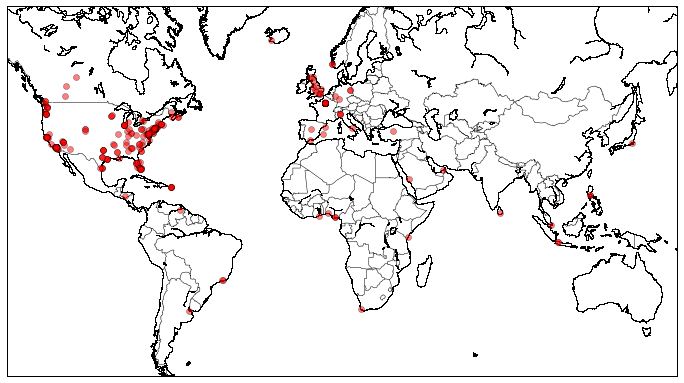

In [25]:
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
 
# plot the blank world map
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
longs = list(loc_df.loc[(loc_df.long != 'NaN')].long)
lats = list(loc_df.loc[loc_df.lat != 'NaN'].lat)
x, y = my_map(longs, lats)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)
 
plt.show()